In [2]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SOURCE = 'rattle.wav'
TARGET = ''

In [4]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
from scipy.io import wavfile
fs, data = wavfile.read(SOURCE)


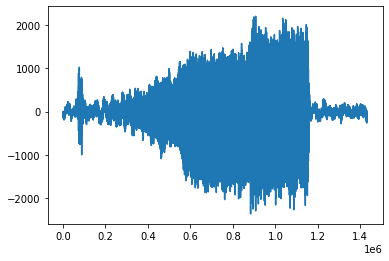

In [5]:
plt.plot(data)

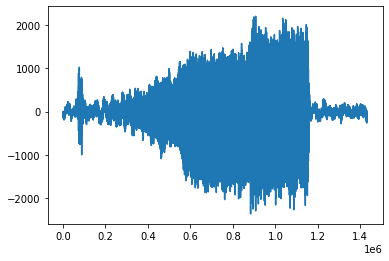

In [6]:
sdata = np.array(data)
plt.plot(sdata)

In [7]:
import os
print(os.getcwd())
print(os.path.exists(SOURCE))

c:\workspace\autoencoder\01_study
True


In [8]:
file = SOURCE
y, sr = librosa.load(file) # (default  sr=22050)
# Return
    # y: np.ndarray [shape=(n,) or (…, n)] / audio time series. Multi-channel is supported.
    # sr: number > 0 [scalar / sampling rate of
print("type(y): ", type(y))
print("y.shape: ", y.shape)
print("type(sr): ", type(sr))
print("sr: ", sr)

S = librosa.feature.melspectrogram(y=y, sr=sr)#, n_mels=128)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(S))
print("S.shape: ", S.shape)

type(y):  <class 'numpy.ndarray'>
y.shape:  (617101,)
type(sr):  <class 'int'>
sr:  22050
type(S):  <class 'numpy.ndarray'>
S.shape:  (128, 1206)


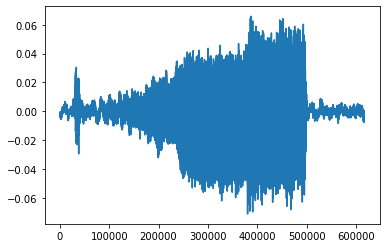

In [9]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
plt.plot(y)
# Time domain data를 그리게 된다.

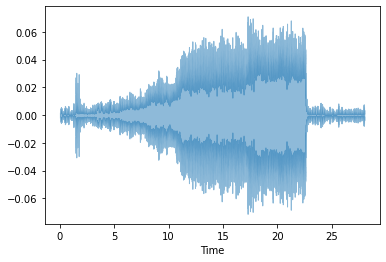

In [10]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
# https://librosa.org/doc/0.9.1/generated/librosa.display.waveshow.html#librosa.display.waveshow
# Visualize a waveform in the time domain
librosa.display.waveshow(y, alpha=0.5)

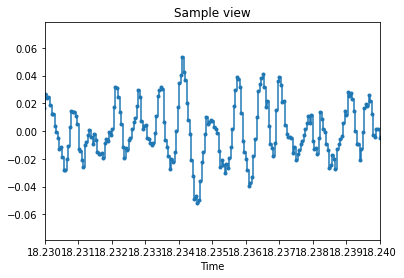

In [11]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
# https://librosa.org/doc/0.9.1/generated/librosa.display.waveshow.html#librosa.display.waveshow
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(xlim=[18.23, 18.24], title='Sample view')#, ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
ax.label_outer()
#Rax.legend()

In [12]:
# DFT(Discrete Fourier Transform)이산 푸리에 변환:
#  시간영역의 진폭값들을 주파수 영역의 진폭값으로 변환하는 것
#  DFT는 연산이 오래 걸리기 때문에 더 빠른 연산이 가능한 고속 푸리에 변환
#  (FFT: Fast Fourier Transform)을 사용한다.
# Time Domain Data: 시간에 따른 진폭값 데이터
# Frequency Domain Data: 주파수별 진폭값 데이터
# FFT는 결국 Time Domain Data를 Frequency Domain Data로 변환 하는 것


In [13]:
# np.fft.fft() = Compute the one-dimensional discrete Fourier Transform.
fft = np.fft.fft(y)
print("fft shaep:", fft.shape)

fft shaep: (617101,)


In [14]:
print(np.min(fft))
print(np.max(fft))
fft

(-305.4159603668482+84.23841326039741j)
(374.55866288669694+105.88652808132196j)


array([21.09750814-3.88578059e-15j,  6.13747814-1.59597180e+00j,
       -2.15093723+3.29426964e+00j, ..., -4.95587454+4.00031532e+00j,
       -2.15093723-3.29426964e+00j,  6.13747814+1.59597180e+00j])

C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


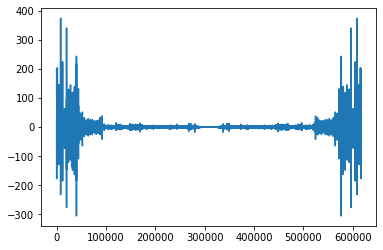

In [15]:
# librosa.display.waveshow(fft) #<-- 에러발생(Audio data must be floating-point)
# librosa.display.specshow(fft) #<-- 에러발생(IndexError: tuple index out of range)
plt.plot(fft)

In [16]:
spectrum = np.abs(fft)
print("spectrun.shape: ",spectrum.shape)
print(spectrum)

spectrun.shape:  (617101,)
[21.09750814  6.34159001  3.93430343 ...  6.36892574  3.93430343
  6.34159001]


In [17]:
print("min(spectrum):", np.min(spectrum))
print("max(spectrum):", np.max(spectrum))
spectrum

min(spectrum): 1.6384209694571397e-05
max(spectrum): 389.2379076767663


array([21.09750814,  6.34159001,  3.93430343, ...,  6.36892574,
        3.93430343,  6.34159001])

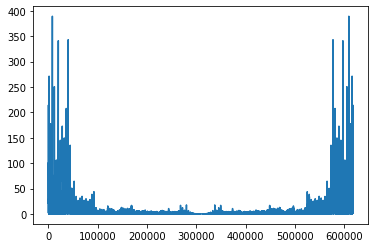

In [18]:
plt.plot(spectrum)

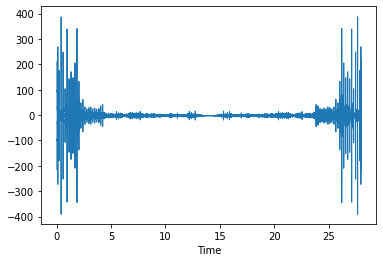

In [19]:
# librosa.display.specshow(spectrum) #<-- 에러발생(IndexError: tuple index out of range)
librosa.display.waveshow(spectrum)

In [20]:
len(spectrum)

617101

In [21]:
# https://ahnjg.tistory.com/83
# create frequency variable
f = np.linspace(0, sr, len(spectrum))
print("f shaep: ", f.shape)
print("")
print("len(spectrum):", len(spectrum))
print("min(spectrum):", min(spectrum))
print("max(spectrum):", max(spectrum))
print("spectrum[0]:", spectrum[0], ", spectrum[617009]:", spectrum[617009], ", spectrum[617100]:", spectrum[617100])
print("")
print("len(f):", len(f))
print("min(f):", min(f))
print("max(f):", max(f))
print("")
print("f[0]:", f[0], ", f[617009]:", f[617009], ", f[617100]:", f[617100])

f shaep:  (617101,)

len(spectrum): 617101
min(spectrum): 1.6384209694571397e-05
max(spectrum): 389.2379076767663
spectrum[0]: 21.09750814108044 , spectrum[617009]: 31.533601404495556 , spectrum[617100]: 6.341590013452173

len(f): 617101
min(f): 0.0
max(f): 22050.0

f[0]: 0.0 , f[617009]: 22046.748420029166 , f[617100]: 22050.0


In [22]:
# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

In [23]:
print("len(left_spectrum):", len(left_spectrum))
print("min(left_spectrum):", min(left_spectrum))
print("max(left_spectrum):", max(left_spectrum))
print("len(left_f):", len(left_f))
print("min(left_f):", min(left_f))
print("max(left_f):", max(left_f))

len(left_spectrum): 308550
min(left_spectrum): 1.638420969957287e-05
max(left_spectrum): 389.2379076767663
len(left_f): 308550
min(left_f): 0.0
max(left_f): 11024.964268351969


Text(0.5, 1.0, 'Power spectrum')

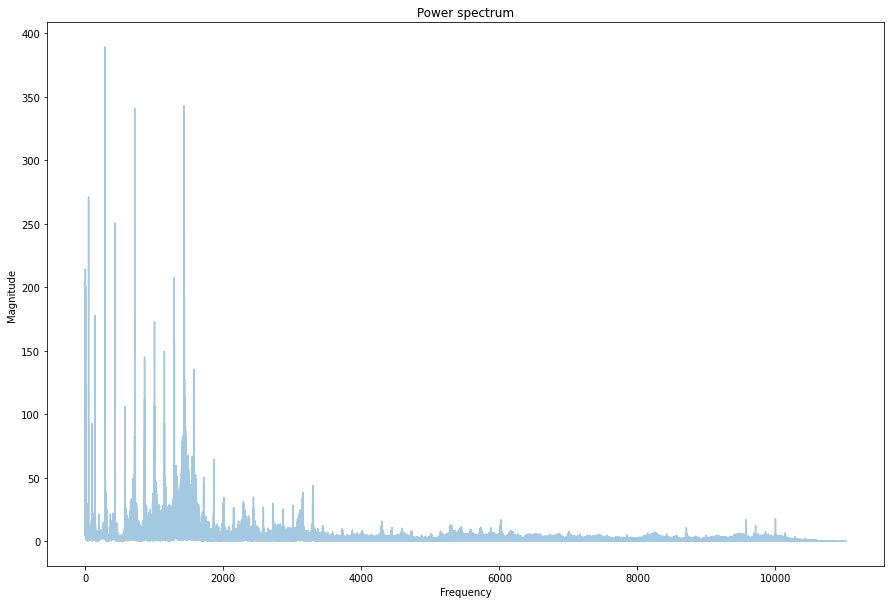

In [24]:
FIG_SIZE = (15, 10)
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [25]:
# STFT -> spectrogram
hop_length = 512  # in num. of samples
n_fft = 2048  # window in num. of samples

In [26]:
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

In [27]:
print("STFT hop length duration is : {}s".format(hop_length_duration))

STFT hop length duration is : 0.023219954648526078s


In [28]:
print("STFT window duration is : {}s".format(n_fft_duration))

STFT window duration is : 0.09287981859410431s


In [29]:
# Perform STFT
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
print("stft shape : ", stft.shape)

stft shape :  (1025, 1206)


In [30]:
librosa.display.waveshow(stft) #<-- 에러발생(ParameterError: Audio data must be floating-point)

ParameterError: Audio data must be floating-point

C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


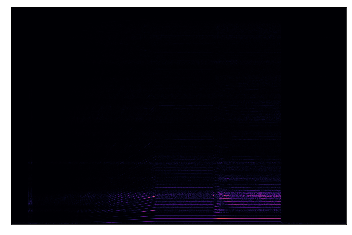

In [31]:
librosa.display.specshow(stft) #<-- 에러발생(IndexError: tuple index out of range)

C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


 ...]

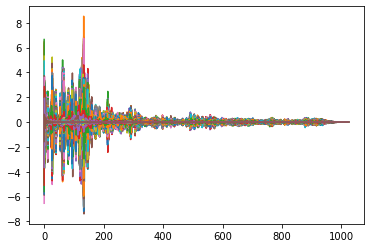

In [32]:
plt.plot(stft)

In [33]:
stft

array([[-1.04530919e+00+0.0000000e+00j, -1.87178123e+00+0.0000000e+00j,
        -2.33484769e+00+0.0000000e+00j, ...,
        -5.08392286e+00+0.0000000e+00j, -3.65153074e+00+0.0000000e+00j,
        -1.57037425e+00+0.0000000e+00j],
       [ 4.99955356e-01-7.1627057e-01j,  1.13300836e+00-7.4683279e-02j,
         9.29455161e-01-3.3894312e-01j, ...,
         2.87468505e+00+3.5434946e-01j,  1.92806113e+00+1.0241138e+00j,
         6.20636582e-01+9.9141771e-01j],
       [ 1.04666680e-01+5.1410818e-01j, -2.56627262e-01-2.6766971e-01j,
         2.72696644e-01+1.5990129e-01j, ...,
        -3.68544310e-01-2.5450251e-01j, -1.30622774e-01-2.2336240e-01j,
         1.70718879e-01-3.1809524e-01j],
       ...,
       [ 7.21423057e-05+9.1328175e-06j, -4.08339693e-05-4.4596050e-06j,
         2.61302193e-06+2.9001035e-06j, ...,
         2.71994236e-06+9.7640095e-06j, -5.85514535e-05-8.1088445e-05j,
         1.82203134e-04+2.1823189e-04j],
       [-7.18653464e-05-4.3793739e-06j, -1.81547477e-06+3.5264096e-0

In [34]:
# Calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)
print("spectrogram shape : ", spectrogram.shape)

spectrogram shape :  (1025, 1206)


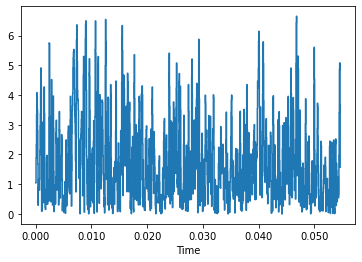

In [35]:
librosa.display.waveshow(spectrogram) #<-- 에러발생(Audio data must be floating-point)

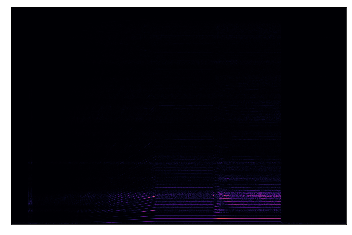

In [36]:
librosa.display.specshow(spectrogram) #<-- 에러발생(IndexError: tuple index out of range)

 ...]

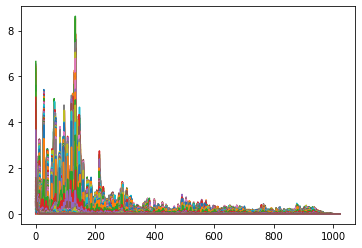

In [37]:
plt.plot(spectrogram)

In [38]:
spectrogram

array([[1.04530919e+00, 1.87178123e+00, 2.33484769e+00, ...,
        5.08392286e+00, 3.65153074e+00, 1.57037425e+00],
       [8.73498082e-01, 1.13546705e+00, 9.89327729e-01, ...,
        2.89644217e+00, 2.18316936e+00, 1.16965759e+00],
       [5.24654508e-01, 3.70816171e-01, 3.16120058e-01, ...,
        4.47879940e-01, 2.58752912e-01, 3.61011803e-01],
       ...,
       [7.27180886e-05, 4.10767716e-05, 3.90364994e-06, ...,
        1.01357764e-05, 1.00018042e-04, 2.84294103e-04],
       [7.19986565e-05, 3.53107971e-05, 8.42101599e-06, ...,
        1.22633628e-05, 7.29800886e-05, 2.72760080e-04],
       [7.17806761e-05, 4.11405454e-05, 1.05780255e-05, ...,
        8.49021762e-06, 8.59161082e-05, 2.69479438e-04]], dtype=float32)

In [39]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

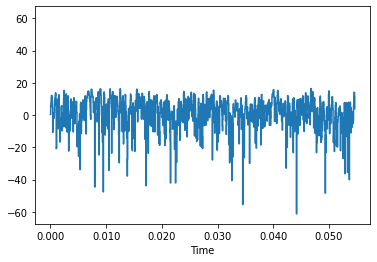

In [40]:
librosa.display.waveshow(log_spectrogram) #<-- 에러발생(Audio data must be floating-point)

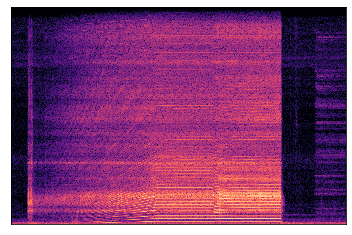

In [41]:
librosa.display.specshow(log_spectrogram) #<-- 에러발생(IndexError: tuple index out of range)

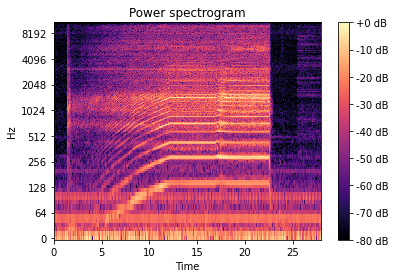

In [42]:
#Display a spectrogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

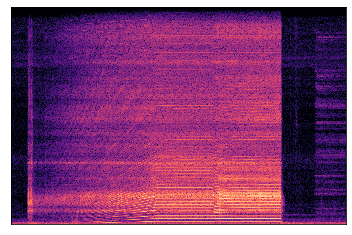

In [43]:
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max))

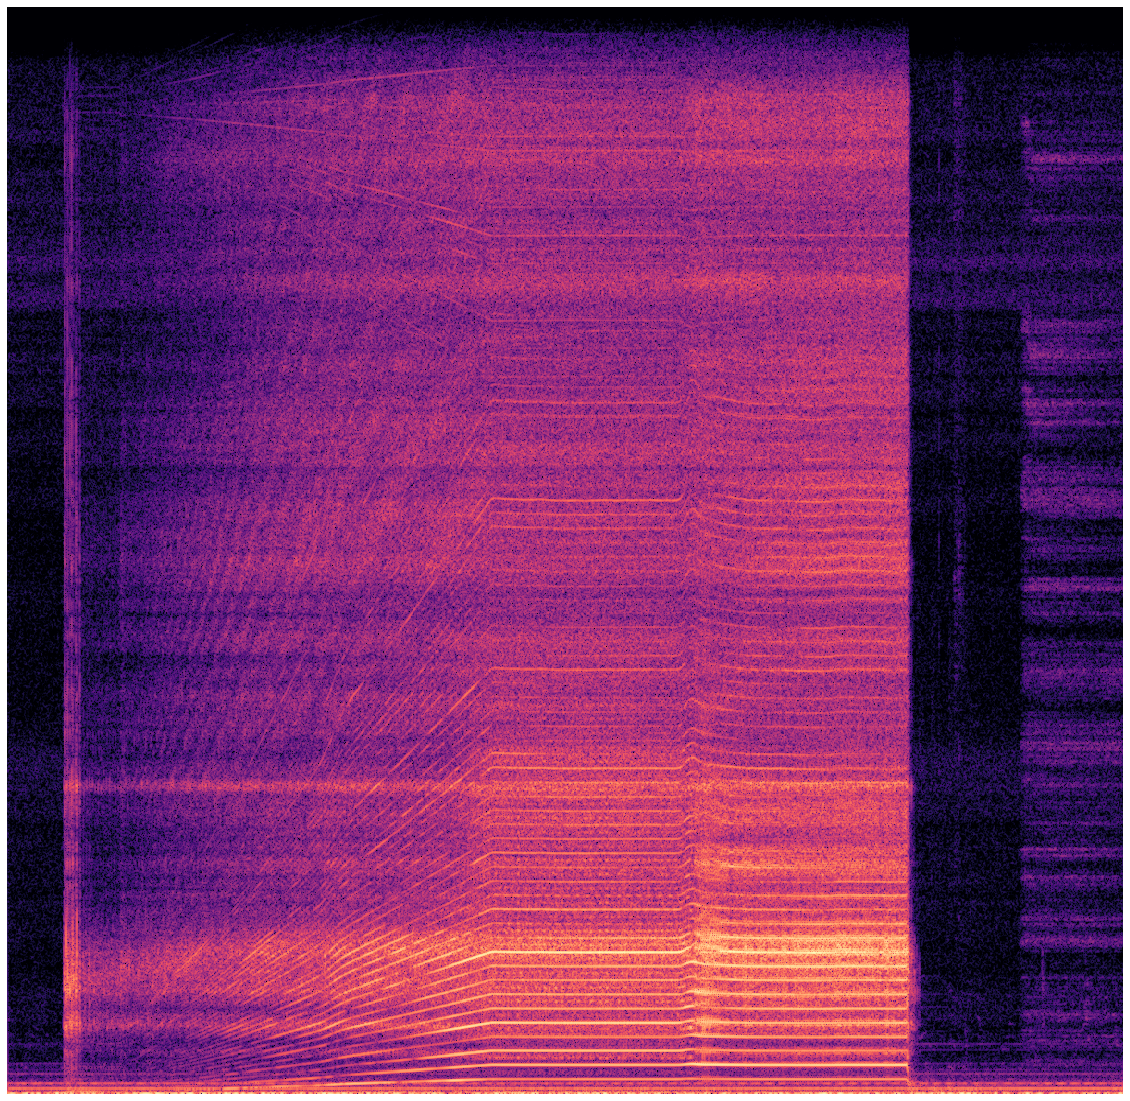

In [44]:
# Matplotlib plots: removing axis, legends and white spaces
plt.figure(figsize=(20,20))
plt.axis('off')
librosa.display.specshow(
    log_spectrogram, sr=sr, hop_length=hop_length)

In [45]:
# Short Time Fourier Transform
# 음원 데이터를 특정 시간 간격으로 쪼갠 뒤, 해당 간격에 있는 파형에 대해 퓨리에 변환을 적용함으로써 주파수 분석을 하는 것
# 출처: https://hyongdoc.tistory.com/401?category=884319 [Doony Garage]

# https://librosa.org/doc/0.9.1/generated/librosa.stft.html?highlight=librosa%20stft#librosa.stft
# librosa.stft(y, *, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='constant')

# n_fft=: win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터입니다. Default n_fft=2048
# hop_length: 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터입니다. 즉, 칼라맵의 시간 주기
# win_length: FFT를 할 때 참조할 그래프의 길이, default는 n_fft와 같습니다.
# S = np.abs(librosa.stft(y, n_fft=2048, hop_length=None, win_length=2048))
S = np.abs(librosa.stft(y))

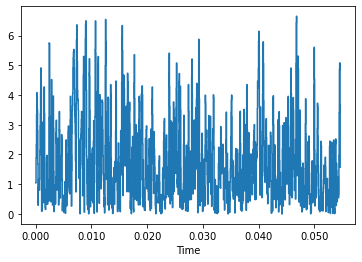

In [46]:
librosa.display.waveshow(S)

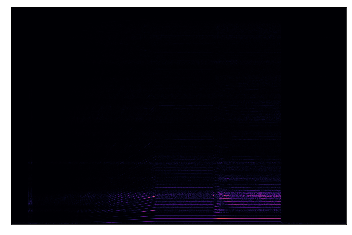

In [47]:
librosa.display.specshow(S)

In [48]:
# Use left-aligned frames, instead of centered frames
S_left = librosa.stft(y, center=False)

In [49]:
# Use a shorter hop length
D_short = librosa.stft(y, hop_length=64)

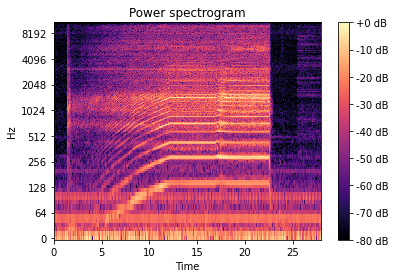

In [50]:
#Display a spectrogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [51]:
Sdefault = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(Sdefault))
print("S.shape: ", Sdefault.shape)

type(S):  <class 'numpy.ndarray'>
S.shape:  (128, 1206)


In [52]:
S256 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(S256))
print("S.shape: ", S256.shape)

type(S):  <class 'numpy.ndarray'>
S.shape:  (256, 1206)


In [53]:
librosa.display.specshow(y)

IndexError: tuple index out of range

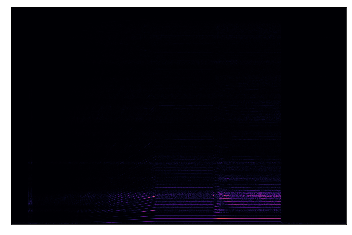

In [54]:
librosa.display.specshow(S)


In [55]:
S_dB = librosa.power_to_db(S, ref=np.max)

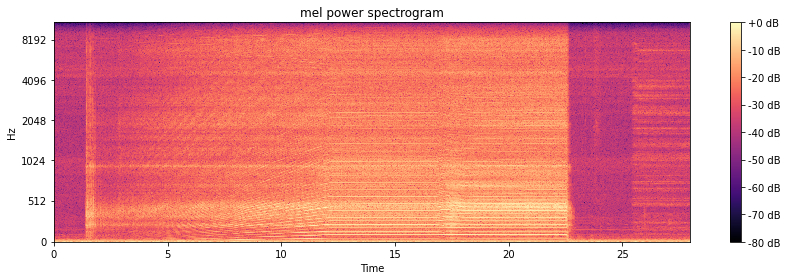

In [56]:
if TARGET == '':
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()
else:
    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    librosa.display.specshow(S_dB, sr=sr)
    plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)
    plt.close(fig) 
